    #####End of distribution imputation

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df=pd.read_csv('C:\\Users\\adarsh\\Untitled Folder\\titanic_train.csv', usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


<AxesSubplot:>

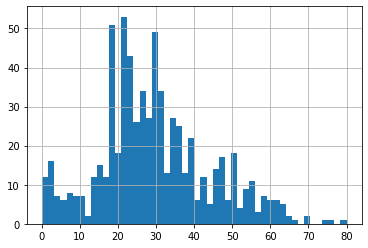

In [55]:
df.age.hist(bins=50)

In [56]:
df.age.mean()

29.519847189349115

In [57]:
extreme =df.age.mean()+3*df.age.std()

c:\users\adarsh\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

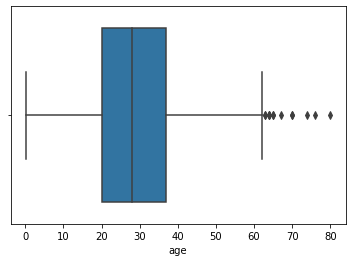

In [58]:
# checking outliers
import seaborn as sns 
sns.boxplot('age',data=df)

##we got outliers on right side

In [59]:
def impute_nan(df,variable,median,extreme):
    df[variable+"end_distirbution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [60]:
impute_nan(df,'age',df.age.median(),extreme)

In [61]:
df.head()

,age,fare,survived,ageend_distirbution
0,28.0,7.7333,1,73.206577
1,38.0,8.6625,0,38.000000
2,30.0,24.1500,0,30.000000
3,54.0,23.0000,1,54.000000
4,40.0,13.0000,0,40.000000


<AxesSubplot:>

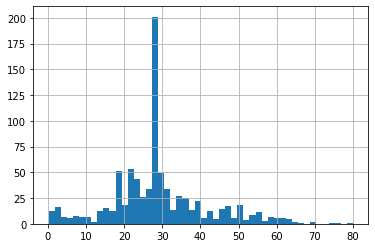

In [62]:
df['age'].hist(bins=50)

<AxesSubplot:>

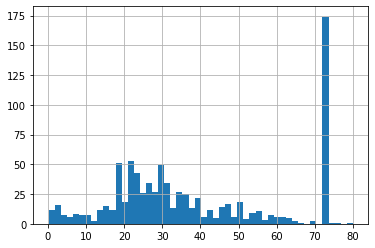

In [63]:
df['ageend_distirbution'].hist(bins=50)

c:\users\adarsh\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ageend_distirbution'>

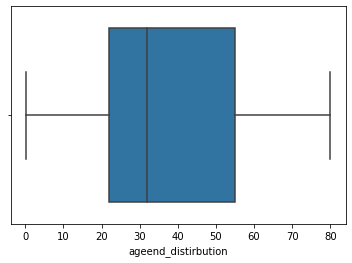

In [64]:
sns.boxplot('ageend_distirbution',data=df)     # proper distribution of age

# advantages
easy to implement
captures the importance of missinges if there is one
#mdisadvantages
distort the original distribution of the variable
if missing is not important it may mask the predictive power of the original variable by distroting its distributing
if the number of NA is big,it will mask true outliers in the distribution
if the number of NA is small , the replaced Ma may be considere an outlier and pre processed in a subsequent feature engineering